# DCL - Data Control Language

DCL stands for Data Control Language in SQL. 


It is a subset of SQL statements that are used to __control access to data within a database.__ DCL statements are primarily focused on managing permissions, security, and access privileges for users and roles. The two main DCL commands are `GRANT` and `REVOKE`.

1. **GRANT :**
   The `GRANT` statement is used to give specific privileges to users or roles. These privileges could include the ability to perform certain actions like SELECT, INSERT, UPDATE, DELETE, etc. on tables or views. By using `GRANT`, you allow users to access and manipulate data in specified ways.

```sql
GRANT privilege_type ON object_name TO user_or_role;
```

To allow a user to access a view, you need to grant them the appropriate privileges. The most common privileges are SELECT, which allows users to retrieve data from the view, and USAGE, which grants permission to use the view.

```sql
GRANT SELECT, USAGE ON AppleStoreSalesView TO username;
```

2. **REVOKE :**
   The `REVOKE` statement is used to take away previously granted privileges. This is done to restrict or remove access from users or roles. It's the opposite of the `GRANT` statement.

```sql
REVOKE privilege_type ON object_name FROM user_or_role;
```

If you want to remove access from a user, you can use the REVOKE statement. This will remove the specified privileges from the user.

```sql
REVOKE SELECT, USAGE ON AppleStoreSalesView FROM username;
```

DCL statements are essential for maintaining database security and ensuring that only authorized users have the appropriate access rights to perform operations on the data. They help prevent unauthorized data manipulation or disclosure.


Different database systems might have variations in the exact syntax and supported privileges, but the concepts of granting and revoking permissions remain consistent across most SQL implementations. It's important to refer to the specific documentation of your chosen database system to understand how to use DCL effectively in that system.

# VIEWS

https://www.youtube.com/watch?v=cLSxasHg9WY&list=PLavw5C92dz9Ef4E-1Zi9KfCTXS_IN8gXZ&index=12

### What are Views?
In SQL, a view is a virtual table that does not store any data on its own but presents a customized view of one or more tables in a database. A view can be thought of as a pre-defined SELECT statement that retrieves data from one or more tables and returns a specific subset of data to the user.


__So basically it is a logical table instead of a physical table.__


Once a view is created, it can be used in the same way as a table in SQL queries, and any
changes made to the underlying tables will be reflected in the view.(Show)

### NOTE :  View never stores data it only stores structure of the table.

## create VIEW Syntax

```sql
CREATE VIEW indigo AS
SELECT * FROM flights_data
WHERE airline='Indigo';
```

```sql
SELECT * from indigo;
```

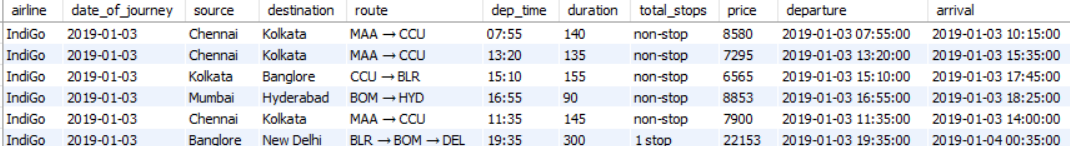

### Uses of VIEWS:

Here are some common uses of VIEWs in MySQL:


- __Data Abstraction :__ You can use a VIEW to abstract complex data structures, making it easier to work with the data. For example, you can create a VIEW that combines data from multiple tables and present it as a single, simplified table.


- __Data Security :__ A VIEW can be used to restrict access to sensitive data by limiting the columns or rows that are visible to specific users.


- __Data Consistency :__ A VIEW can be used to enforce data consistency by preventing direct updates to the underlying tables and forcing all updates to be made through the VIEW.


- __Simplifying Complex Queries :__ You can use a VIEW to simplify complex queries by encapsulating the logic of the query in the VIEW definition. This makes it easier to understand and maintain the query, and also makes it easier to reuse the query in multiple places.

```sql
CREATE VIEW vw_employee_info AS
SELECT first_name, last_name, hire_date
FROM employees;
```

__NOTE :__ Once a VIEW is created, you can use it just like a regular table in your SELECT, UPDATE, and DELETE statements.

```sql
SELECT * from vw_employee_info;
```

### Advantages of using view: 

- __Simplify complex queries :__ Views break down complex queries into smaller pieces.


- __Improve data security :__ Views restrict access to sensitive data by only exposing a subset of columns.


- __Reuse and maintain code :__ Views encapsulate complex calculations and logic for reuse and easy maintenance.


- __Improve performance :__ Views simplify complex queries and make them more efficient.


- __Abstract data :__ Views provide a simplified and unified view of data.



__NOTE : VIEW is not faster than a normal query__

### Advantage of using view for security:

- not giving full access of table to the client.

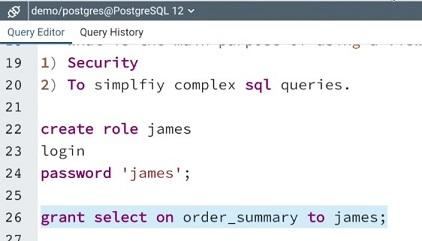

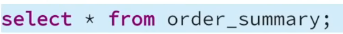

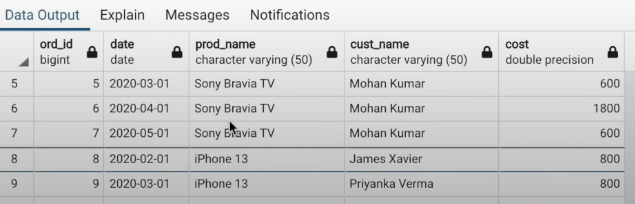

### NOTE : client will not be able to see the query behind the view

## Rules for using CREATE OR REPLACE in view to Modify the view:

### 1. **Column Names and Data Types:** 

`You can` modify column names, aliases, and expressions in the `SELECT` statement of the view, but you should ensure that the new column names and data types match the expected usage in dependent queries.

```sql
CREATE OR REPLACE VIEW vw_employee_info AS
SELECT CONVERT(sl_no as VARCHAR(255)) as serial_number,
first_name, last_name, hire_date
FROM employees;
```

##### this query will work when we are changing column name and datatype of sl_no as serial_no and datatype from int to varchar

### 2. **Column Order:** 

When altering a view using `CREATE OR REPLACE`, `you can change the order` of the columns in the `SELECT` statement, but this should be done carefully, as it might affect queries that rely on the column order.

```sql
CREATE OR REPLACE VIEW vw_employee_info AS
SELECT CONVERT(sl_no as VARCHAR(255)) as serial_number,
 hire_date , first_name, last_name
FROM employees;
```

##### this query will work when we are changing order of hire_date column. bringing it before first_name

### 3.  **Column Count:** 

We can add new columns in the view at any position

```sql
CREATE OR REPLACE VIEW vw_employee_info AS
SELECT CONVERT(sl_no as VARCHAR(255)) as serial_number,
CONCAT(first_name,' ', last_name) as 'full_name',
 hire_date , first_name, last_name
FROM employees;
```

##### adding a new column full_name

## ALTER VIEW in view:


- Columns can be renamed using ALTER 

```sql
CREATE OR REPLACE VIEW vw_employee
as
select * from emplyees
WHERE name like 'am%';
```

### NOTE: FOR VIEW :

> __1. If we add new data  or change data of the table then view will show it automatically get updated. but vice-versa is not true.__

>> __But Making changes in "read only view" won't reflect on original table__

```sql
UPDATE iphone
SET store_name = 'apple Original 1'
WHERE product = 'Apple Original 1';
```

##### the view made on iphone table
```sql
select * from iphone_sales;
```

##### the view  updated automatically

>__2. But we change the structure of the table then view wont show it and we need to recreate or refresh the view.__

### DROP view

```sql
DROP VIEW vw_employee;
```

### Types of views

#### 1. Simple Views - Created from 1 single table


#### 2. Complex Views - Created from multiple tables with the help of joins, subquery etc.

```sql
select * from flights_data;
```

```sql
CREATE VIEW indigo AS
SELECT * FROM flights_data
WHERE airline='Indigo';
```

### Complex View:

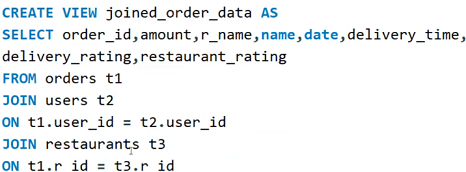

### Read only Vs Updatable Views

- __Read-only views:__ As the name suggests, read-only views are views that cannot be
updated. They are used to simplify the process of querying data, but they cannot be
used to modify or delete data in the underlying tables.


- __Updatable views:__ Updatable views are views that allow you to modify, insert or
delete data in the underlying tables through the view. They behave like normal
tables, but with restrictions.


To make a view updatable, certain conditions must be met. For example, the view
must not contain any derived columns, subqueries, or aggregate functions.
Additionally, the view must be based on a single table or a join of tables with a
unique one-to-one relationship.

### NOTE: changes made only in "updatable views" will be reflected in the base tables

### Updatable views should follow the below rules : 

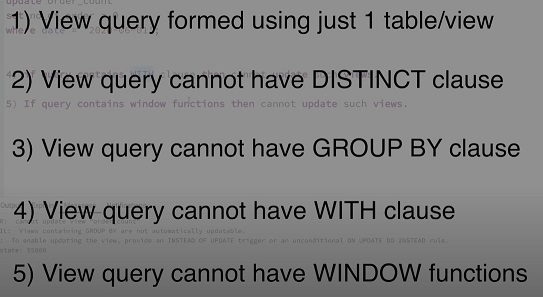

These rules ensure data integrity and consistency. Here are the typical rules that updatable views should follow:

1. **Single Table Rule:** The view must be based on a single underlying table (or a set of joined tables) to ensure clear mapping of modifications.


2. **Key Preservation Rule:** The view must contain enough information to uniquely identify each row in the underlying table(s), ensuring that updates can be correctly targeted.


3. **Updatable Columns Rule:** Columns that are part of the view and can be updated must originate from a single base table, not computed or aggregated columns.


4. **No Derived Columns Rule:** Calculated or derived columns cannot be modified through the view; only directly mapped columns are updatable.


5. **No Aggregate Functions Rule:** Views with aggregate functions (e.g., SUM, COUNT) usually aren't updatable, as they represent summary data.


6. **No GROUP BY Rule:** Views with a GROUP BY clause often can't be updated due to the potential ambiguity of applying updates to grouped data.


7. **No UNION/JOIN with UPDATE Rule:** Views that involve unions or joins might not be updatable if they introduce complexities in mapping changes.


8. **No Subqueries Rule:** Views with subqueries in the SELECT statement generally can't be updated, as they make the mapping between view and base data unclear.


9. **Column Check Rule:** Views may have CHECK constraints that ensure updated values meet certain criteria.


10. **No ROWID Pseudocolumn Rule:** Views should not expose the ROWID pseudocolumn, which uniquely identifies rows internally in Oracle databases, as it can lead to inconsistencies.


11. **No DISTINCT Keyword Rule:** Views with DISTINCT might not be updatable due to potential ambiguities when updating duplicated data.


12. **No GROUP BY in WHERE Clause Rule:** Views containing GROUP BY clauses in the WHERE condition might not be updatable.


13. __No with clause() and WINDOW function__

It's important to note that different database management systems may have variations in these rules, and some systems might support more complex updatable views through mechanisms like triggers. Always refer to the documentation of your specific database system for detailed information on updatable views and their limitations.

## WITH CHECK()

 `WITH CHECK OPTION` is a clause that can be used when creating or modifying a view. It is used to ensure that any data modifications (inserts, updates, or deletes) performed through the view adhere to the conditions specified in the view's definition. If a row doesn't satisfy the conditions of the view, the modification is disallowed.

#### eg:

Let's say you have a database with two tables: `employees` and `departments`. 


You want to create a view that shows employees from the 'Marketing' department. 

You can create this view and use the `WITH CHECK OPTION` to ensure that only employees from the 'Marketing' department can be inserted or modified through the view:

```sql
CREATE VIEW marketing_employees AS
SELECT employee_id, employee_name, department_id
FROM employees
WHERE department_id = 1; -- Assuming 'Marketing' department has ID 1
```

#### Enable the CHECK OPTION
```sql
WITH CHECK OPTION;
```

Now, if you try to insert an employee from a department other than 'Marketing' through the `marketing_employees` view, the operation will be rejected:

```sql
-- This will not work because the CHECK OPTION ensures only 'Marketing' department employees are inserted

INSERT INTO marketing_employees (employee_id, employee_name, department_id)
VALUES (101, 'John Doe', 2); -- Department 2 is not 'Marketing'
```

Similarly, if you try to update an employee's department to something other than 'Marketing', it will also be disallowed:

```sql
-- This will not work because the CHECK OPTION ensures only 'Marketing' department employees can be modified

UPDATE marketing_employees
SET department_id = 3 -- Assuming department 3 is not 'Marketing'
WHERE employee_id = 101;
```

The `WITH CHECK OPTION` clause is particularly useful when you want to restrict data modifications through a view to a specific subset of data based on certain conditions. It ensures that any data modifications made through the view remain consistent with the view's filtering criteria.


Keep in mind that the behavior of `WITH CHECK OPTION` may vary between different database systems. Always refer to your specific database system's documentation for precise details and behavior.

## Apply restrictions on users with access to view of the table regarding updating the table

When you grant a user access to a view, you can control whether the user's actions on the view can affect the underlying base table. To ensure that changes made to the view do not affect the original table, you need to set up the appropriate permissions and restrictions. Here's how you can achieve this:

1. **Use Read-Only Views:** When granting access to a view, only provide `SELECT` permissions to the user. This way, they can retrieve data from the view but won't be able to modify it.



2. **Revoke Write Permissions:** Ensure that the user doesn't have any write permissions (`INSERT`, `UPDATE`, `DELETE`) on the view. You can use the `REVOKE` statement to remove such permissions if they were granted unintentionally.



3. **Database Permissions:** Make sure that the user doesn't have direct write permissions on the underlying base table. This will prevent them from affecting the original table even if they attempt to do so through the view.



4. **Use Read-Only Roles:** Assign the user a read-only role that grants access only to views and not the underlying tables. This way, they won't have the capability to modify data even if they try to modify the view.



5. **Use Triggers or Stored Procedures:** If you want to provide users with limited write access to certain data, consider using triggers or stored procedures. These mechanisms can help you control the actions users can take, ensuring that modifications go through controlled processes.



6. **Regular Auditing and Monitoring:** Regularly audit and monitor the user's actions and permissions to ensure they are not making unauthorized changes. Monitoring tools and database logs can help you keep track of user activities.



Remember that security measures should be implemented based on your specific requirements and the sensitivity of the data. Carefully consider the level of access each user needs and implement the necessary checks to prevent unintended modifications.

---

## MATERIALIZED VIEW
https://www.youtube.com/watch?v=WzkBZ0byoYE&list=PLavw5C92dz9Ef4E-1Zi9KfCTXS_IN8gXZ&index=17

### NOTE : Mysql doesnot have materialized view but it holds data unlike views

A Materialized View is a pre-computed table that is stored on disk, which can be used to improve query performance by reducing the amount of data that needs to be processed at runtime.

A materialized view is a database object in SQL that contains the results of a query. Unlike regular views, which are just virtual tables that store SQL queries, materialized views are physical tables that store the results of a query.

Materialized views are precomputed and stored on disk, which makes them much faster to access than regular views.

__Benefit - Faster queries__


__Disadvantage - Need to manually update the view__

### query : 

```sql
create materialized view mv_random_tab
as
select id, avg(val), count(*)
from random_tab
group by id;

select * from my_random_tab;
```

- The results will be same as using a select statement but faster.


- The data in materialized view will not automatically update if table gets updated. Can only be updated using refresh

eg : refresh materialized view mv_random_tab;

-  Donot create materialized view for each and every data

### NOTE : data inside Materialized view will not get updated automatically if data is changed under the base table.


### Benefits of using Materialized View:


- __Improved query performance :__ Materialized Views can significantly improve query performance by reducing the amount of data that needs to be processed at runtime. This is because the data in a Materialized View is pre-computed and stored on disk, so the database can retrieve it quickly without having to perform complex calculations at runtime.

- __Reduced data redundancy:__ Materialized Views can help reduce data redundancy by storing commonly used data in a centralized location, so it can be easily referenced by multiple queries.


- __Improved data consistency:__ Materialized Views can be used to enforce data consistency by preventing updates to the underlying data until the Materialized View has been refreshed.


- __Improved scalability:__ Materialized Views can be used to distribute data across multiple nodes in a distributed database, which can help improve scalability and performance in high-traffic environments.


- __Improved resource utilization :__ Materialized Views can help improve resource utilization by reducing the amount of processing required at runtime, which can help reduce CPU, memory, and disk I/O utilization.


- __Simplified data management:__ Materialized Views can simplify data management by reducing the complexity of the underlying data, making it easier to understand, maintain, and update.



__In summary, Materialized Views are a powerful tool that can significantly improve query performance, reduce data redundancy, enforce data consistency, improve scalability, and simplify data management in SQL databases.__






### Difference between view and materialized view()

___Materialized view stores the data and the query but view only stores the datanot the  query .___

- A View is a virtual table that does not store data but contains a SELECT statement that is executed each time the View is referenced in a query. 

- A Materialized View is a pre-computed table that stores data on disk and can be used to improve query performance. 


- Views always reflect the most up-to-date data, but have no performance benefits. 

- Materialized Views need to be refreshed and use more disk space, but can significantly improve query performance.

---
---

# User Defined Functions

What are user defined function and their advantages

User-defined functions (UDFs) in SQL are functions that are created by users to perform specific tasks. These functions can be used just like built-
in functions in SQL and can take parameters as input, perform some operations on them, and then return a value.

### Syntax

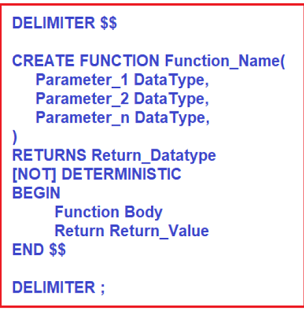

### Benefits of user defined function

1. Simplifies SQL queries


2. Reusability


3. Enhances readability

### eg 1 - hello world()

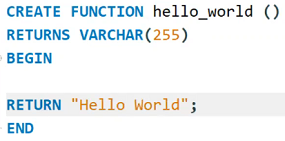

```sql
SELECT hello_world()
```

#### parameterized vs non parameterized

A parameterized function accepts input values (parameters) when called, allowing flexibility and reusability, 

while a non-parameterized function operates with fixed internal values and lacks adaptability to different scenarios.

### eg- 2 : Calculate age in years(for col)

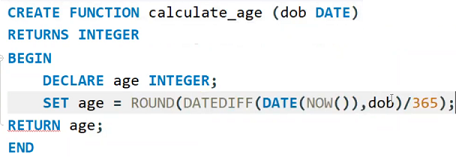

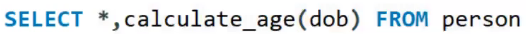

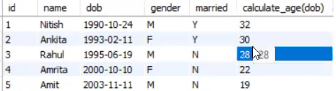

### eg - 3 : greet with name -> conditional title-> user defined function for Mr/Mrs/Miss : 

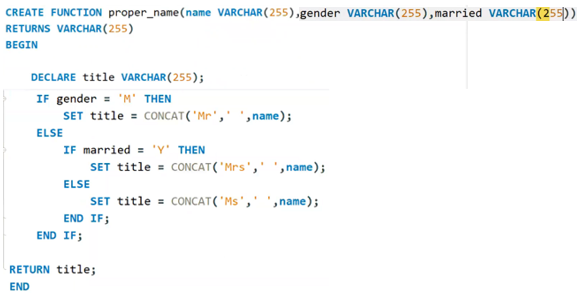

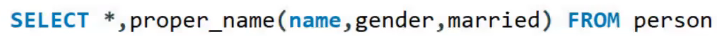

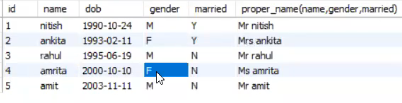

### eg-4 : Date formatting and flights between 2 cities(deterministic Vs Non Deterministic) :

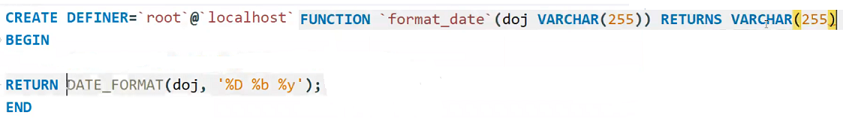

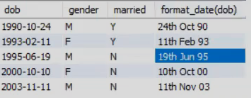

#### now for number of flights :  (here in the function itself we are giving table name)

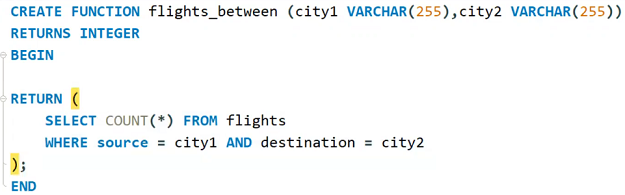

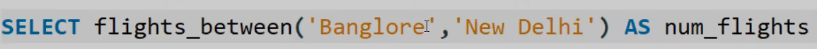

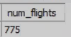

### Deterministic vs Non-Deterministic Functions

Deterministic functions always produce the same result for the same input, while non-deterministic functions can yield different results even with the same input due to factors like randomness or external influences.

#### eg : 

##### Deterministic function: always returns the same result for the same input:

##### Non-deterministic function: can produce different results depending on external factors:

# USER-DEFINED VARIABLE

In MySQL, the @ symbol is used as a user-defined variable. It allows you to store a value or expression and reuse it multiple times within a single query or across multiple queries.

```sql
SET @variable_name = value;
```


```sql
SELECT @variable_name;
```

For example, you can use the following syntax to define a user-defined variable in MySQL:

```sql
DELIMITER //

CREATE PROCEDURE calculateSum(IN a INT, IN b INT)
BEGIN
    DECLARE sum INT;
    SET sum = a + b;
    SELECT sum;
END;

//

DELIMITER ;

```

```sql
-- Call the stored procedure and pass the two input values
CALL calculateSum(10, 20);
```

When you call the calculateSum stored procedure with the values 10 and 20, it will calculate the sum and store it in the sum variable declared within the procedure.

If you want to use session variables in regular SQL queries, you can do so by using the SET statement:

```sql
SET @sum = 10 + 20;
SELECT @sum;
```

#### eg 2:

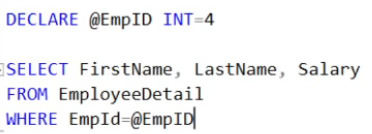

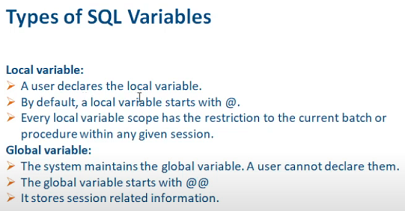

### NOTE : Global variable cannot be declared by user

---
---
---

# Stored Procedures

https://www.youtube.com/watch?v=yLR1w4tZ36I&list=PLavw5C92dz9Ef4E-1Zi9KfCTXS_IN8gXZ&index=15

A stored procedure is a named block of SQL statements and procedural logic that is stored in a
database and can be executed by a user or application.



Stored procedures are often used to encapsulate business logic and application logic, such as
data validation, data processing, and database updates. By using stored procedures,
developers can separate application logic from the presentation layer and simplify the
application code.

#### Procedures can do things which SQL queries cannot

Procedure can include 
- SQL queries
- DML, DDL, DCL, TCL commands
- Collection types
- Cursors
- Loop & IF ELSE statements
- Variables
- Exception Handling

#### Some of the benefits of using stored procedures include:


1. __Improved performance :__ Stored procedures are precompiled and optimized, which can
improve performance and reduce network traffic.


2. __Enhanced security :__ Stored procedures can be granted specific permissions and access
rights, which can improve security and limit access to sensitive data.


3. __Encapsulation of business logic :__ Stored procedures allow developers to encapsulate
complex business logic and make it easier to maintain and update.


4. __Consistency :__ Stored procedures ensure that database operations are performed in a
consistent manner, which can help to maintain data integrity.


5. __Reduced network traffic :__ By encapsulating data access and manipulation logic in stored
procedures, developers can reduce the amount of data that needs to be transmitted over
the network.

### 1. Create stored procedure to create a new user. If already exists Show error message otherwise add

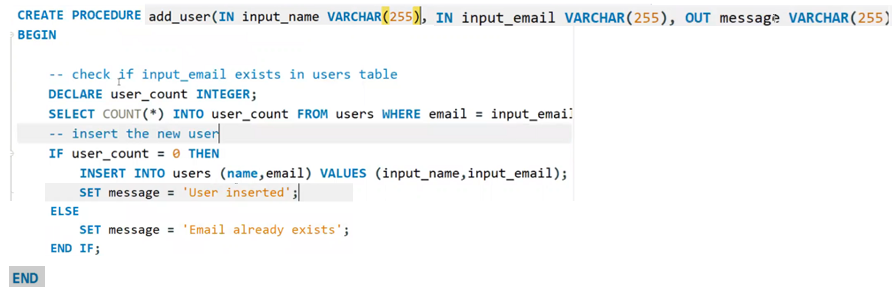

##### as the function needs 3 parameters : name,email,message so we will create a message

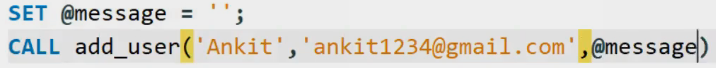

##### to view the output :

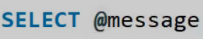

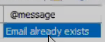

### 2. Create stored procedure to show orders placed by 1 single user when email is passed

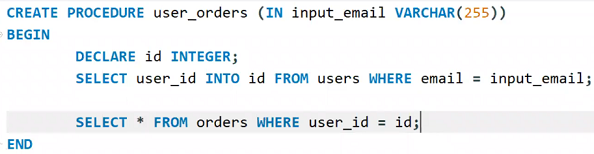

##### using 3rd user : vartika@gmail.com

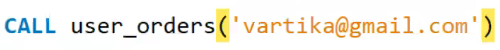

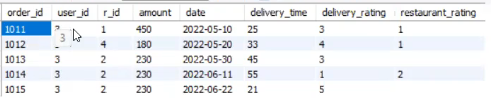

### 3. Create a stored procedure to place an order when user_id, restuarant_id, food_id is provided and also display total amount of order placed

##### how the data should look after insertion :
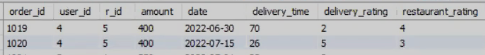

### NOTE : CREATE OR REPLACE PROCEDURE doesnot works in MYSQL. Need to drop the procedure and recreate it again.

```sql
DROP PROCEDURE IF EXISTS place_order;
```

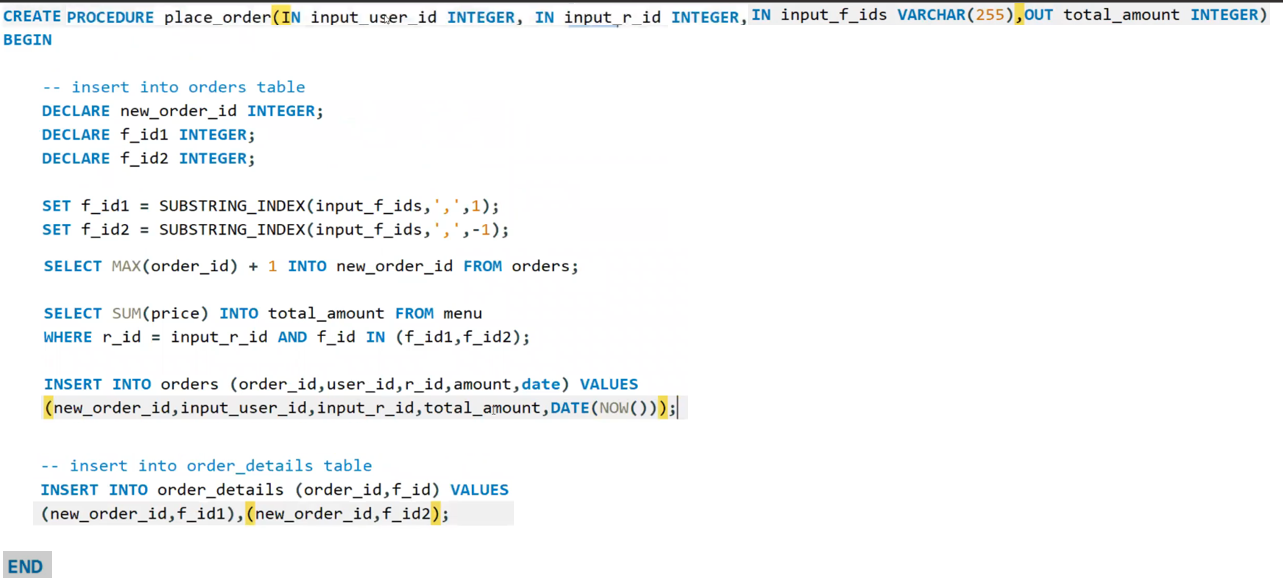

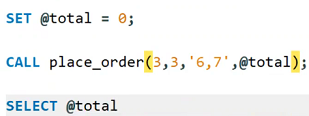

##### output:
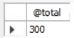

##### select * from orders;

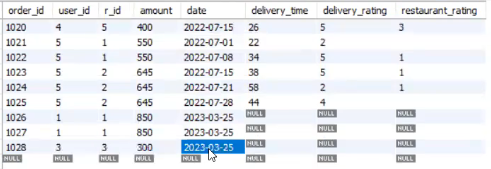

##### select * from order_details;

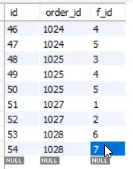

### 4. another example : procedure without parameters

> __Q. When iphone 13 Pro Max is bought, insert the order in sales table and decrease the quantity_remaining from products table and increase quantity_sold in products table. quantity is kept = 1__

#### inital tables:

##### initial products table :  
```sql
select * from products;
```

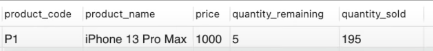

##### initial sales table:
```sql
select * from sales
```

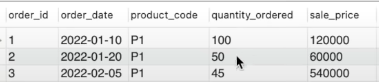

#### procedure : 

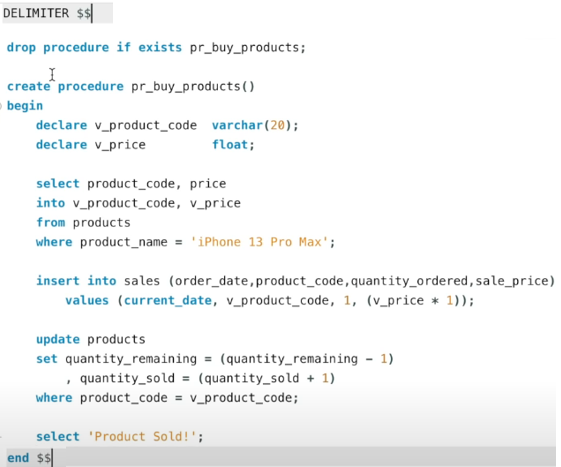

#### run the procedure

```sql
call pr_buy_products();
```

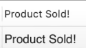

#### output:

##### product_table:

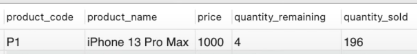

##### sales table:
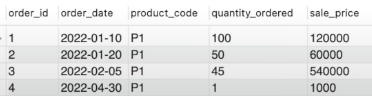

### 5. procedure with parameters

> __Q. For every given PRODUCT and the quantity,__

>> __a. Check if product is available based on the required QUANTITY.__

>> __b. If available then modify the database tables accordingly.__


#### initial tables : 

##### product table:

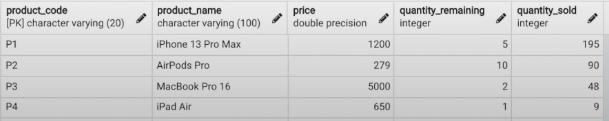

##### sales table : 
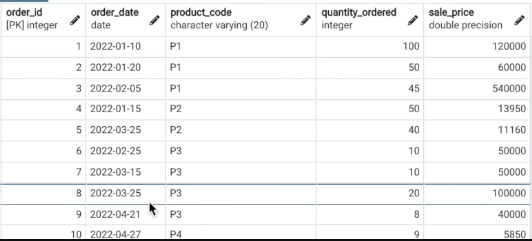

#### procedure : 

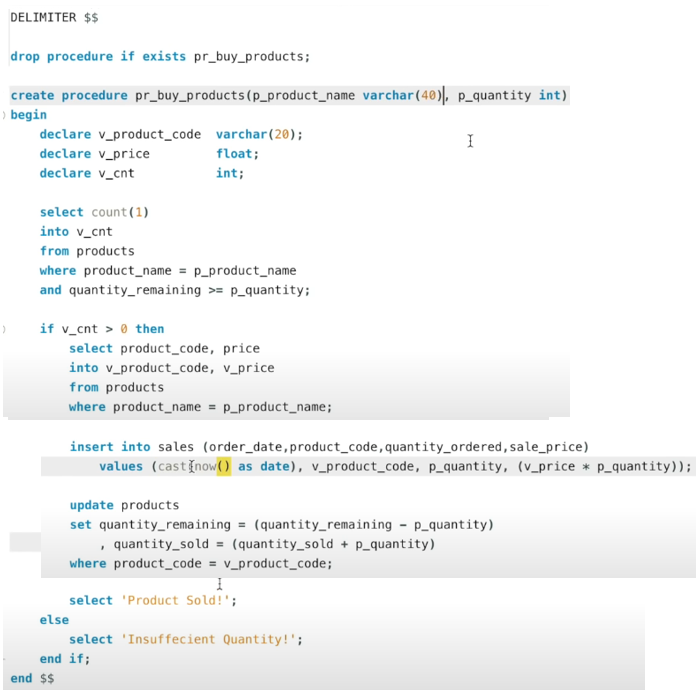

#### run the procedure : 

```sql
call pr_buy_products('Airpods Pro',5);
```

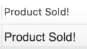

#### output

##### products_table:
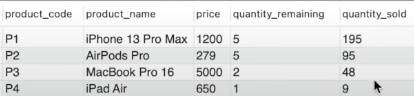

##### sales_table:
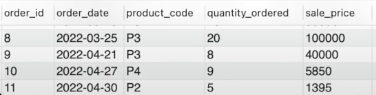

#### 11th row added

## CURSORS

- In SQL, a cursor is a database object that allows you to retrieve and manipulate rows of a result set one at a time. It provides a way to traverse through the rows of a query result, perform operations on them, and access the data in a controlled manner.


- Cursors are often used when you need to process rows sequentially, perform calculations, apply conditions, or update data in a procedural manner. Cursors are commonly used within stored procedures, functions, and triggers.

### Types of curosrs:

There are two main types of cursors in SQL:

### 1. **Implicit Cursors:**


Implicit cursors are automatically managed by the database system when executing a SQL statement. They are used for single-row queries that return a single result. You don't need to explicitly declare or manage these cursors.


   For example, when you run a simple `SELECT` statement like:
   ```sql
   SELECT column_name FROM table_name WHERE condition;
   ```
   The database system handles the cursor internally to retrieve the result row(s).

### 2. **Explicit Cursors:**


Explicit cursors are declared and managed by the user. They provide more control over the retrieval and manipulation of data. Explicit cursors are used for more complex scenarios where you want to iterate through multiple rows, perform calculations, and handle conditions.

#### To use an explicit cursor, you need to:

   
   - Declare the cursor with a unique name.
   
   
   - Associate the cursor with a specific query using the `SELECT` statement.
   
   
   - Open the cursor.
   
   
   - Fetch rows one by one using `FETCH` statements.
   
   
   - Process the fetched data.
   
   
   - Close the cursor when done.

Here's a simplified example of using an explicit cursor:

```sql
DECLARE cursor_name CURSOR FOR
SELECT column_name FROM table_name WHERE condition;

OPEN cursor_name;

FETCH NEXT FROM cursor_name INTO @variable;

WHILE @@FETCH_STATUS = 0
BEGIN
   -- Process @variable
   FETCH NEXT FROM cursor_name INTO @variable;
END

CLOSE cursor_name;
DEALLOCATE cursor_name;
```

It's worth noting that while cursors provide a way to process data sequentially, they can be less efficient than using set-based operations, especially when dealing with large datasets. 


___In many cases, it's recommended to explore alternative approaches such as using joins, subqueries, and other SQL features to achieve your desired results without the need for cursors.___

### Attributes of Cursor:

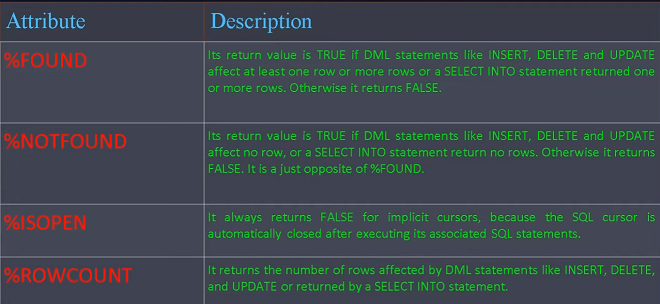

## Exception Handling

Exception handling in SQL refers to the mechanism by which you can gracefully handle and manage errors that may occur during the execution of SQL statements or procedures. 

- TRY: You put your main instructions in a "TRY" block. It's like the normal set of steps you want to happen.


- CATCH: You also create a "CATCH" block, like a backup plan. If something unexpected happens in the "TRY" block, the code jumps to the "CATCH" block.


- HANDLE: Inside the "CATCH" block, you write what to do if something goes wrong. Maybe you'll show an error message, log the issue, or even fix it.

##### eg : 

```sql
BEGIN TRY
    -- Your main instructions
    SELECT 10 / 2;  -- This works fine
    SELECT 5 / 0;   -- Oops, division by zero!
END TRY
BEGIN CATCH
    -- Your backup plan
    PRINT 'Something went wrong!';  -- Show an error message
    -- You can also log the error or take other actions here
END CATCH;

--- the first division works fine, but the second one causes a problem (division by zero). Instead of crashing, the code jumps to the "CATCH" block, shows an error message, and you can handle the issue without the whole process falling apart.
```

Here's an overview of how exception handling works in SQL:

1. **TRY-CATCH Blocks:**
   Most modern database systems support a TRY-CATCH block structure, which allows you to wrap the risky code inside a TRY block. If an exception occurs, it is caught by the associated CATCH block, where you can handle the error condition.


2. **RAISE or THROW:**
   Inside the CATCH block, you can use the RAISE or THROW statement to explicitly raise or re-throw the exception after handling it. This allows you to bubble up the exception to higher levels of code for further handling if needed.


3. **Error Codes and Messages:**
   When an exception occurs, the database system provides an error code and an error message that describe the nature of the error. These details can be useful for identifying the cause of the problem and handling it appropriately.


4. **Logging and Notification:**
   Exception handling often involves logging the error details for debugging and audit purposes. You might also want to send notifications to system administrators or other stakeholders when critical errors occur.


5. **Rollback and Transactions:**
   In many cases, when an exception occurs within a transaction, you might want to perform a rollback to ensure that the database remains in a consistent state. Transactions help maintain data integrity by allowing you to undo changes made before the exception occurred.


6. **Custom Exception Handling:**
   Some database systems allow you to define custom exception types and handlers, which can provide more granularity in how you handle different types of errors.

Here's a simplified example of exception handling using a TRY-CATCH block in SQL Server:

```sql
BEGIN TRY
    -- Risky SQL code
    SELECT 1 / 0;  -- This will cause a division by zero error
END TRY
BEGIN CATCH
    -- Handle the exception
    PRINT 'An error occurred: ' + ERROR_MESSAGE();
END CATCH;
```

Remember that exception handling is an essential part of writing robust and reliable database code. It helps ensure that your application can gracefully handle unexpected scenarios, maintain data integrity, and provide a better user experience.

### Types of Exception Handling:

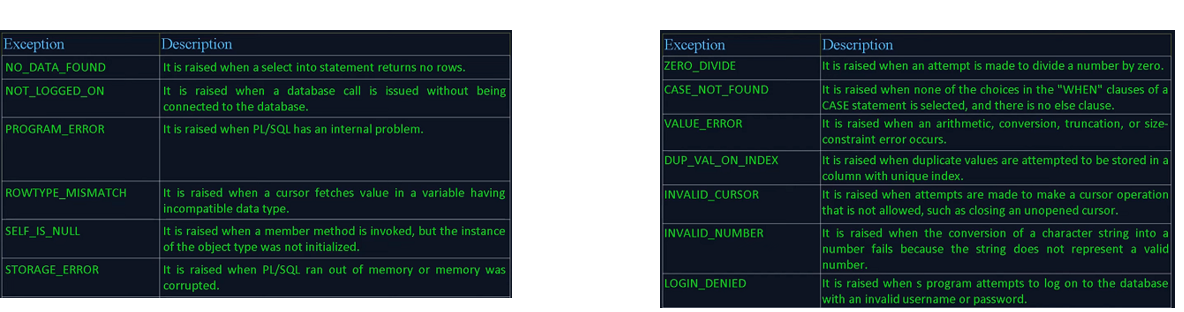

#### eg: table has no id present as id= 8:

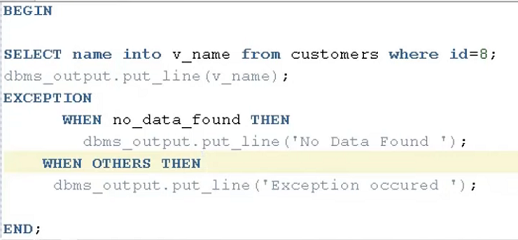

---

### UDFs vs Stored Procedures

**User-Defined Functions (UDFs):**

- Returns a single value or a table.


- Designed to be used in SQL expressions.


- Can be used in SELECT, WHERE, and other clauses.


- Cannot contain DML statements that modify data.


- Can be called directly within queries.


**Stored Procedures:**


- Executes a series of SQL statements.


- Often used for encapsulating business logic.


- Can contain DML statements that modify data.


- Supports input and output parameters.


- Can be executed using a CALL statement.

---
---

# Transactions

### What are Transactions?

A database transaction is a sequence of operations that are performed as a single logical unit
of work in a database management system (DBMS). A transaction may consist of one or more
database operations, such as inserts, updates, or deletes, which are treated as a single atomic
operation by the DBMS.

It follows the principle of all or none.

### What is Commit, Rollback and Savepoint?

In a database transaction, there are three main commands that are used to manage the
transaction:
1. __Commit :__ A commit command is used to permanently save the changes made by a
transaction to the database. When a transaction is committed, all changes made by the
transaction are made permanent and cannot be rolled back.


2. __Rollback :__ A rollback command is used to undo the changes made by a transaction and
return the database to its state before the transaction began. When a transaction is rolled
back, all changes made by the transaction are discarded and the database is returned to
its previous state.


3. __Savepoint :__ A savepoint command is used to mark a specific point within a transaction
where a rollback can be performed. This allows for partial rollbacks of a transaction,
where only changes made after the savepoint are undone, while changes made before
the savepoint are still committed to the database.

## What is Autocommit?

Autocommit is a feature of database management systems (DBMS) that automatically
commits each individual database transaction as soon as it is completed, rather than requiring
an explicit commit command to be issued.

___INSERT is a autocommit command___

When Autocommit is enabled, each individual SQL statement issued against the database is
treated as a separate transaction and is committed immediately after it is executed. This
means that each SQL statement becomes a separate, independent transaction, and its effects
are immediately visible to other users.

#### If autocommit = 0 then the changes will not be permenent:

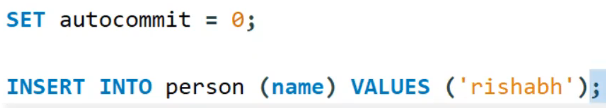

#### Making it permanent:

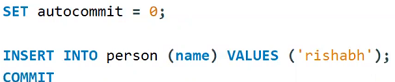

#### initial table :

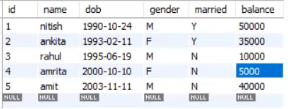

### 1. START TRANSACTION -> show operations without committing

##### no rollback, no commit: so no permanent changes

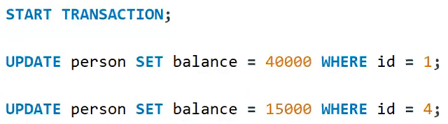

##### Now using commit() for permanent changes:

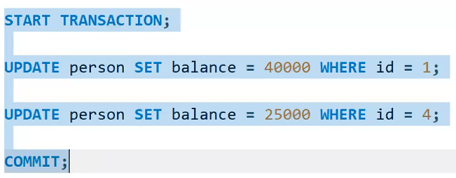

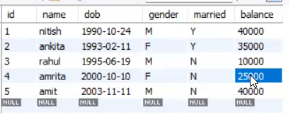

### 2. START TRANSACTION -> all or none with commit

##### initial table : 

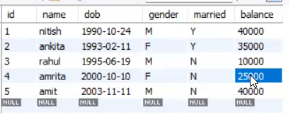

##### knowingly making mistake in second update command. first will get executed but second won't

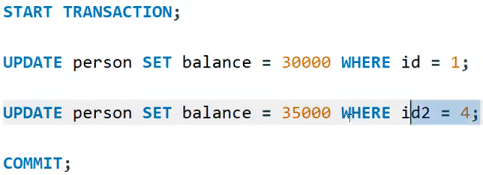

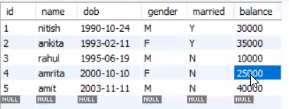

##### after reconnection :

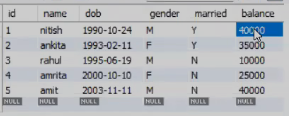

##### still no changes were made even after using commit()

### 3. rollback

#### rollback happens in opposite direction. first 2nd command will be executed, then 1st will be executed.

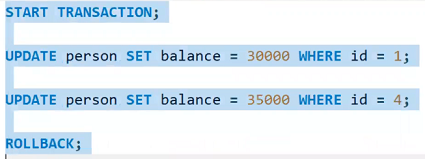

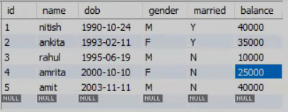

##### due to rollback no changes were made. table is still in the form at start transaction.

### 4. rollback with savepoint

##### rollbacking to point B. So A will be executed but B won't

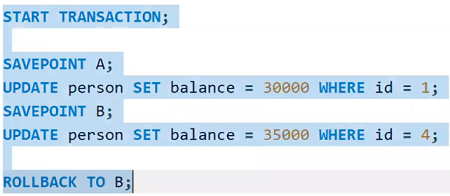

##### output:

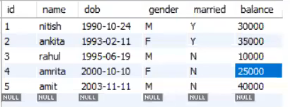

### 5. rollback and commit together

## What is ACID properties of a Transaction?

ACID is an acronym that stands for Atomicity, Consistency, Isolation, and Durability, which are
a set of properties that ensure reliable database transactions:


1. __Atomicity :__ This property ensures that a transaction is treated as a single, indivisible unit
of work. This means that either all of the changes made by a transaction are committed to
the database, or none of them are. If any part of the transaction fails, the entire
transaction is rolled back, and all changes are undone.


2. __Consistency :__ This property ensures that a transaction takes the database from one valid
state to another valid state. It requires that all data in the database must conform to a set
of rules, or constraints, which ensure data integrity.


3. __Isolation :__ This property ensures that concurrent transactions do not interfere with each
other. It requires that each transaction executes as if it were the only transaction
executing against the database, even if multiple transactions are executing at the same
time.


4. __Durability :__ This property ensures that once a transaction is committed, its changes are
permanently stored in the database, even in the event of a system failure or power
outage. This is typically achieved through the use of database backups, replication, or
other forms of data redundancy.

Together, these properties ensure that database transactions are reliable, consistent, and
accurate, and that the data stored in a database is both protected and available at all times.
The ACID properties are essential for mission-critical applications that require high levels of
data integrity and availability, such as banking, finance, and healthcare systems.

---
---

# Recursive SQL Queries

A recursive SQL query, also known as a recursive common table expression (CTE), is a powerful feature in SQL that allows you to perform recursive operations on hierarchical data stored in a relational database. This is particularly useful for dealing with data structures like trees and graphs. Recursive SQL queries are often used to traverse parent-child relationships or to perform tasks such as finding the path between two nodes in a tree structure.

Recursive CTEs work by defining a base case and a recursive case. The base case provides the starting point for the recursion, and the recursive case builds upon the results of previous iterations.

Here's a basic explanation using a hypothetical example. Let's say we have a table named "Employees" with the following columns: employee_id, employee_name, and manager_id. The "manager_id" column indicates the manager for each employee, forming a hierarchical structure.

Example table "Employees":
```
| employee_id | employee_name | manager_id |
|-------------|---------------|------------|
| 1           | Alice         | NULL       |
| 2           | Bob           | 1          |
| 3           | Carol         | 1          |
| 4           | Dave          | 2          |
| 5           | Eve           | 3          |
```

Now, let's say we want to find the hierarchy for a specific employee. We can use a recursive CTE to achieve this:

```sql
WITH RECURSIVE EmployeeHierarchy AS (
    SELECT employee_id, employee_name, manager_id
    FROM Employees
    WHERE employee_name = 'Alice'
    UNION ALL
    SELECT e.employee_id, e.employee_name, e.manager_id
    FROM Employees e
    JOIN EmployeeHierarchy eh ON e.manager_id = eh.employee_id
)
SELECT * FROM EmployeeHierarchy;
```

In this example, the CTE starts with the base case where we select the information for the employee named 'Alice'. Then, in the recursive part, we join the CTE with the Employees table based on the manager_id to find the direct reports of each manager. This process continues until no more rows can be added to the result set.

The final result of the query would be:
```
| employee_id | employee_name | manager_id |
|-------------|---------------|------------|
| 1           | Alice         | NULL       |
| 2           | Bob           | 1          |
| 3           | Carol         | 1          |
| 4           | Dave          | 2          |
| 5           | Eve           | 3          |
```

Recursive SQL queries can be quite powerful for working with hierarchical data, but they require careful consideration to avoid infinite loops or performance issues. It's important to set up proper termination conditions in your recursive query to ensure that the recursion stops at some point.